# Handwriting recognition

## Data import and visualization

Import the MNIST train dataset ([https://en.wikipedia.org/wiki/MNIST_database](https://en.wikipedia.org/wiki/MNIST_database))

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# This dataset is contained in the sample data directory of Google Colab online runtimes
data = np.genfromtxt('sample_data/mnist_train_small.csv', delimiter=',')
data.shape

(20000, 785)

Store the data in a matrix and the labels in a vector

In [2]:
labels_full = data[:,0]
A_full = data[:,1:].transpose()
labels_full.shape, A_full.shape

((20000,), (784, 20000))

Visualize the first 30 pictures with the corresponding labels

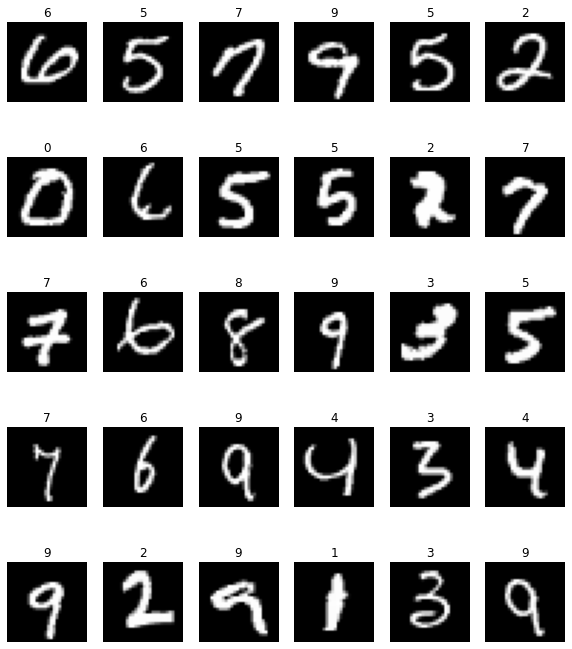

In [3]:
fig, axs = plt.subplots(5,6, figsize = (10,12))
axs = axs.flatten()
for i in range(30):
  axs[i].imshow(np.reshape(A_full[:,i], (28, 28)), cmap = 'gray')
  axs[i].axis('off')
  axs[i].set_title('%d' % labels_full[i])

Visualize the first 30 pictures corresponding the the digit "9"

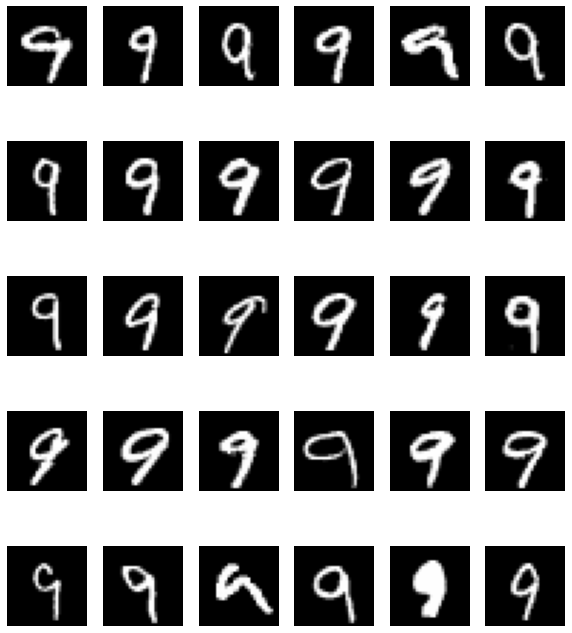

In [4]:
A_filter = A_full[:, labels_full == 9]

fig, axs = plt.subplots(5,6, figsize = (10,12))
axs = axs.flatten()
for i in range(30):
  axs[i].imshow(np.reshape(A_filter[:,i], (28, 28)), cmap = 'gray')
  axs[i].axis('off')

### Classification of two digits (0 and 9)

We now focus on the digits 0 and 9 only. Build a reduced training dataset containing only images corresponding to these digits.

In [5]:
mask = np.logical_or(labels_full == 0, labels_full == 9)
A = A_full[:, mask]
labels = labels_full[mask]

Plot the first 30 training images. 

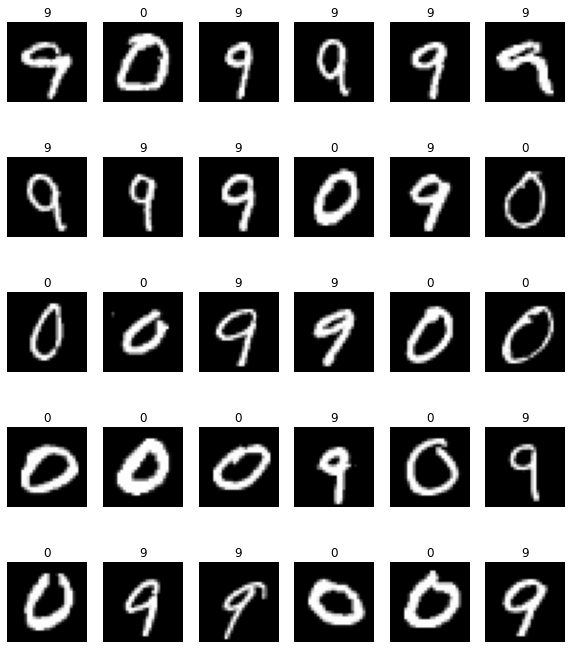

In [6]:
fig, axs = plt.subplots(5,6, figsize = (10,12))
axs = axs.flatten()
for i in range(30):
  axs[i].imshow(np.reshape(A[:,i], (28, 28)), cmap = 'gray')
  axs[i].axis('off')
  axs[i].set_title('%d' % labels[i])

Compute and visualize the average of the training data

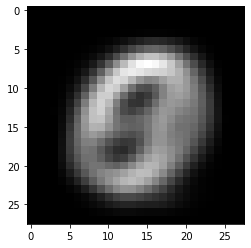

In [7]:
A_mean = np.mean(A, axis = 1)
plt.imshow(np.reshape(A_mean, (28, 28)), cmap = 'gray')

Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

In [8]:
U, s, VT = np.linalg.svd(A - A_mean[:, np.newaxis], full_matrices = False)

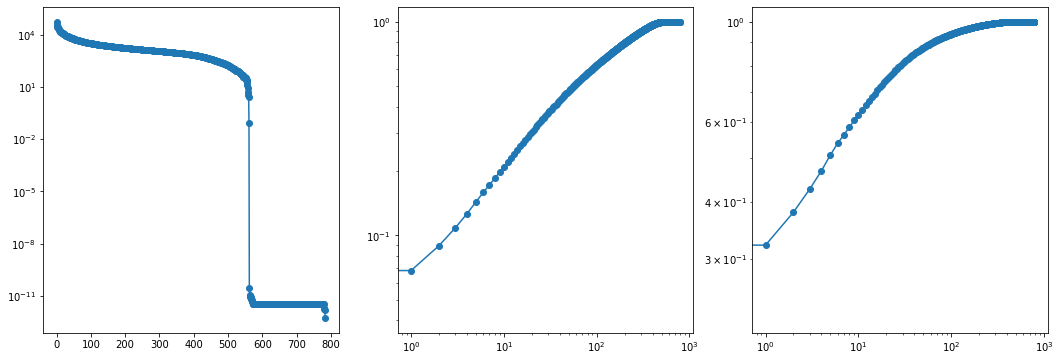

In [9]:
fig, axs = plt.subplots(1,3, figsize = (18,6))
axs[0].semilogy(s, 'o-')
axs[1].loglog(np.cumsum(s) / np.sum(s), 'o-')
axs[2].loglog(np.cumsum(s**2) / np.sum(s**2), 'o-')

Visualize the first 30 principal axes

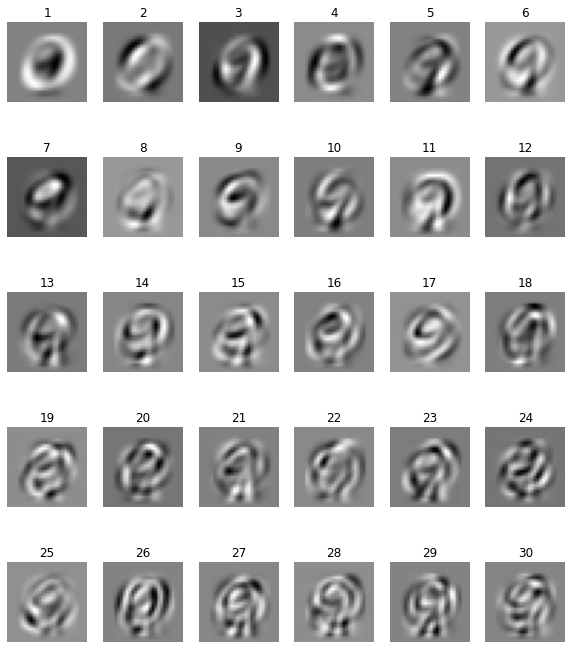

In [10]:
fig, axs = plt.subplots(5,6, figsize = (10,12))
axs = axs.flatten()
for i in range(30):
  q = 0
  axs[i].imshow(np.reshape(U[:,q + i], (28, 28)), cmap = 'gray')
  axs[i].axis('off')
  axs[i].set_title(q + i + 1)

Compute the first two principal components corresponding to the first image

In [11]:
print(np.inner(A[:,0] - A_mean, U[:,0]))
print(np.inner(A[:,0] - A_mean, U[:,1]))

-529.0964148086608
-580.860850162437


Define a matrix corresponding all the principal components of all the images, and check the result of the previous point

In [12]:
Phi = U.transpose() @ (A - A_mean[:, np.newaxis])
print(Phi[0,0])
print(Phi[1,0])

-529.0964148086608
-580.8608501624371


Create a scatterplot for the first 2 principal components of all the training images, grouped by label. Consider only the first 500 pictures.

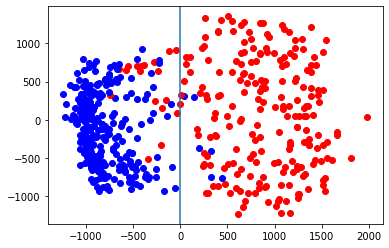

In [13]:
for i in range(500):
  col = 'r' if labels[i] == 0 else 'b'
  plt.scatter(Phi[0,i], Phi[1, i], color = col)

plt.axvline(0)

Define a classifier, by fixing a threshold on the first principal component. Then, test the classifier on the MNIST test dataset. Compute the number of true/false positive/negative for both the digits (confusion matrix) and the accuracy of the classifier.

In [14]:
data_test = np.genfromtxt('sample_data/mnist_test.csv', delimiter=',')
labels_full_test = data_test[:,0]
A_full_test = data_test[:,1:].transpose()
labels_full_test.shape, A_full_test.shape

((10000,), (784, 10000))

In [15]:
mask = np.logical_or(labels_full_test == 0, labels_full_test == 9)
A_test = A_full_test[:, mask]
labels_test = labels_full_test[mask]
A_test.shape, labels_test.shape

((784, 1989), (1989,))

In [16]:
pc1_test = U[:,0] @ (A_test - A_mean[:, np.newaxis])
labels_predicted = np.empty(labels_test.shape).astype(int)
labels_predicted[pc1_test < 0] = 9
labels_predicted[pc1_test >= 0] = 0

true_9 = np.sum(np.logical_and(labels_predicted == 9, labels_test == 9))
true_0 = np.sum(np.logical_and(labels_predicted == 0, labels_test == 0))
false_9 = np.sum(np.logical_and(labels_predicted == 9, labels_test == 0))
false_0 = np.sum(np.logical_and(labels_predicted == 0, labels_test == 9))

print('true 9: %d' % true_9)
print('true 0: %d' % true_0)
print('false 9: %d' % false_9)
print('false 0: %d' % false_0)

true 9: 979
true 0: 927
false 9: 53
false 0: 30


In [17]:
print('accuracy: %1.2f percent' % ((true_9 + true_0)/(len(labels_test))*100))

accuracy: 95.83 percent
